In [1]:
from google.colab import drive                  
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn
          
import matplotlib.pyplot as plt             
import cv2  #openCV  

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras import Model
from tqdm import tqdm
from sklearn.utils import shuffle 

In [ ]:
from PIL import Image
import os
import numpy as np
import re
def get_data(path):
  all_images_as_array=[]
  label=[]
  for filename in os.listdir(path):
    for name in os.listdir(path+'/'+filename):
      try:
        if re.search(r'LDPTCYHMFW',name):
          label.append(1)
        else:
          label.append(0)
        img=Image.open(path + '/'+filename+'/'+name)
        np_array = np.asarray(img)
        l,b,c = np_array.shape
        np_array = np_array.reshape(l*b*c)
        all_images_as_array.append(np_array)
      except:
        continue
  return np.array(all_images_as_array), np.array(label)
path_to_train_set = '/content/drive/My Drive/Images Projet Final/train/Output train'
path_to_test_set = '/content/drive/My Drive/Images Projet Final/test/Output test'
X_train,y_train = get_data(path_to_train_set)
X_test, y_test = get_data(path_to_test_set)
print('X_train set : ',X_train)
print('y_train set : ',y_train)
print('X_test set : ',X_test)
print('y_test set : ',y_test)

In [4]:
import os
import numpy as np
import scipy.io
import cv2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

FileNotFoundError: ignored

In [13]:
train_x = []
train_y = []
dir = "/content/drive/My Drive/Images Projet Final/train/Output train"
for folder in os.listdir(dir): 
  for imgs in os.listdir(dir+'/'+folder):
    img_num = int(imgs)
    train_y.append(img_labels[img_num])
    image = cv2.imread(os.path.join(dir, imgs))
    resized = cv2.resize(image, (150,150))
    normalized_img = cv2.normalize(resized, None, alpha=0, beta=1, 
                              norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    train_x.append(normalized_img)
  train_x = np.array(train_x)


ValueError: ignored

In [ ]:
trainx, valx, trainy, valy = train_test_split(train_x, train_y, test_size=0.15, random_state=10) 

In [ ]:
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

In [ ]:
training_images= trainx/255.0
test_images=valx/255.0

training_images = trainx.reshape((6960,150,150,3))
valx = valx.reshape((1229,150,150,3))
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))
print('Test Dataset Shape: {}'.format(valx.shape))
print('No. of Test Dataset Labels: {}'.format(len(valy)))

In [ ]:
trainy = to_categorical(trainy)
valy = to_categorical(valy)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
from fastai.vision import *
from fastai import *

In [ ]:
import os
import numpy as np
import shutil
import random



# # Creating Train / Val / Test folders (One time use)

root_dir = '/content/drive/My Drive/Images Projet Final'
classes_dir = ['/Mario', '/Luigi', '/Yoshi', '/Link', '/Captain Falcon',
'/Toad', '/Waluigi', '/Fox', '/Daisy','/Harmonie',
'/Professor Layton', '/Donkey Kong', '/Tiny Kong', '/Pikachu', '/Phoenix Wright']

val_ratio = 0.0
test_ratio = 0.30

for cls in classes_dir:
  os.makedirs(root_dir + '/train'+ cls)
  os.makedirs(root_dir + '/val'+ cls)
  os.makedirs(root_dir + '/test'+ cls)
  print(cls)
  src = root_dir + cls # Folder to copy images from
  allFileNames = os.listdir(src) # Creating partitions of the data after shuffeling
  np.random.shuffle(allFileNames)
  for i in allFileNames:
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    #val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]



  print('Total images: ', len(allFileNames))
  print('Training: ', len(train_FileNames))

  #print('Validation: ', len(val_FileNames))
  print('Testing: ', len(test_FileNames))

  # Copy-pasting images

  for name in train_FileNames:
    shutil.copy(name, root_dir +'/train' + cls)

  #for name in val_FileNames:
  # shutil.copy(name, root_dir +'/val' + cls)

  for name in test_FileNames:
    shutil.copy(name, root_dir +'/test' + cls)

/Mario
Total images:  454
Training:  317
Testing:  137
/Luigi
Total images:  346
Training:  242
Testing:  104
/Yoshi
Total images:  206
Training:  144
Testing:  62
/Link
Total images:  453
Training:  317
Testing:  136
/Captain Falcon
Total images:  159
Training:  111
Testing:  48
/Toad
Total images:  433
Training:  303
Testing:  130
/Waluigi
Total images:  236
Training:  165
Testing:  71
/Fox
Total images:  500
Training:  350
Testing:  150
/Daisy
Total images:  236
Training:  165
Testing:  71
/Harmonie
Total images:  207
Training:  144
Testing:  63
/Professor Layton
Total images:  102
Training:  71
Testing:  31
/Donkey Kong
Total images:  113
Training:  79
Testing:  34
/Tiny Kong
Total images:  326
Training:  228
Testing:  98
/Pikachu
Total images:  402
Training:  281
Testing:  121
/Phoenix Wright
Total images:  100
Training:  70
Testing:  30


In [18]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/My Drive/Images Projet Final/train/Output train", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
splitfolders.fixed("/content/drive/My Drive/Images Projet Final/test/Output test", output="output", seed=1337,  oversample=False, group_prefix=None) # default values


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  8.92 files/s]
Copying files: 10 files [00:00, 12.21 files/s]
Copying files: 20 files [00:00, 16.52 files/s]
Copying files: 30 files [00:00, 21.94 files/s]
Copying files: 43 files [00:00, 29.12 files/s]
Copying files: 51 files [00:00, 25.14 files/s]
Copying files: 60 files [00:01, 31.91 files/s]
Copying files: 67 files [00:01, 28.64 files/s]
Copying files: 76 files [00:01, 35.84 files/s]
Copying files: 86 files [00:01, 43.34 files/s]
Copying files: 96 files [00:01, 50.68 files/s]
Copying files: 105 files [00:02, 39.67 files/s]
Copying files: 112 files [00:02, 18.74 files/s]
Copying files: 117 files [00:03, 21.49 files/s]
Copying files: 127 files [00:03, 19.68 files/s]
Copying files: 138 files [00:04, 20.30 files/s]
Copying files: 150 files [00:04, 25.02 files/s]
Copying files: 156 files [00:05, 16.09 files/s]
Copying files: 160 files [00:05, 11.35 files/s]
Copying files: 163 files [00:05, 10.92 files/s]
Copying f

ValueError: ignored

In [15]:
pip install split-folders tqdm

In [ ]:
pip install split-folders tqdm

In [82]:
class_names =class_names = ['Daisy', 'Yoshi', 'Harmonie', 'Waluigi', 'Professor Layton', 'Phoenix Wright', 'Donkey Kong', 'Captain Falcon', 
               'Luigi', 'Mario' , 'Link', 'Pikachu', 'Toad', 'Tiny Kong', 'Fox']
# Dico des Labels
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

def load_data():
    
    #Chemin d'accès aux datasets seg_train seg_test - A MODIFIER
    datasets = ['/content/drive/My Drive/Images Projet Final/train/Output train', '/content/drive/My Drive/Images Projet Final/test/Output test']
    output = []
    size = (150,150)
    
    # Parcours des datasets
    for dataset in datasets:
        # Création de 2 listes images et labels
        # A COMPLETER
        
        images = []
        labels = []  
        
        # Parcours des sous-dossiers de chaque dossier 
        for folder in os.listdir(dataset):
            
            #Récupération du label (0, 1, 2,...) associé au sous-dossier folder à partir de class_names_label
            # A COMPLETER
            label = class_names_label[folder]
            
            # Parcours de chaque image dans chaque sous-dossier
            for file in tqdm((os.listdir(os.path.join(dataset, folder)))):
                
                # Récupération du chemin de l'image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Lecture de l'image avec Cv2
                # A COMPLETER
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                
                # Ajout de image dans la listes images et labels
                # A COMPLETER
                images.append(curr_img)
                labels.append(label)    
                images, labels = shuffle(images, labels)
        # Conversion des listes images et labels en numpy.array
        # A COMPLETER
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
                
        # Ajout d'images et labels à la liste output
        output.append((images, labels))
    return output
    
    
    
    # Création de (train_images, train_labels), (test_images, test_labels) à partir de la fonction load_data()
# A COMPLETER
(x_train, y_train), (x_test, y_test) = load_data()
# Mélanger aléatoirement le dataset de train à l'aide de la fonction `shuffle()`
# A COMPLETER
x_train, y_train = shuffle(x_train, y_train)

 93%|█████████▎| 63/68 [00:00<00:00, 186.13it/s]


error: ignored

In [4]:
Train = (x_train.shape, y_train.shape)
test = (x_test.shape, y_test.shape)

In [5]:
Train

((3045, 150, 150, 3), (3045,))

In [6]:
test

((1321, 150, 150, 3), (1321,))

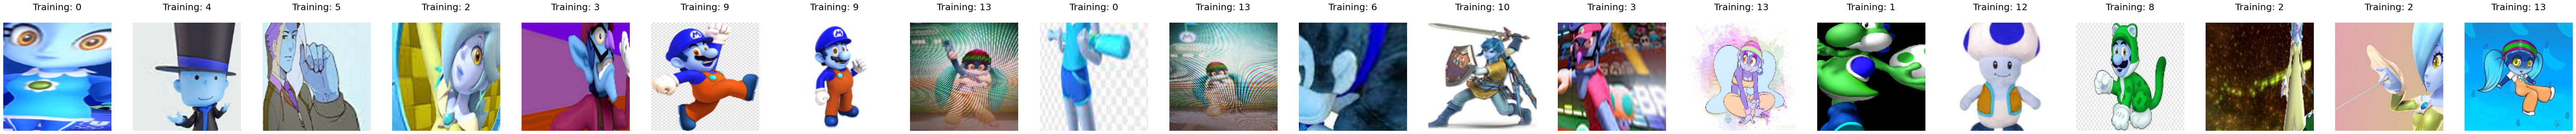

In [7]:
plt.figure(figsize=(200,200))

for index, (image, label) in enumerate(zip(x_train[20:40],y_train[20:40])):

 plt.subplot(20, 40, index + 1)

 plt.imshow(image/255)

 plt.title('Training: %i\n' % label, fontsize = 20)

 plt.axis('off');

plt.show()

In [11]:
x_train /= 255

x_test /= 255



print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])

print('Number of images in x_test', x_test.shape[0])
import pandas as pd

train_images=x_train
train_labels=y_train

train_df = pd.DataFrame([train_images, train_labels],index=['train_images', 'train_labels']).T

x_train shape: (3045, 150, 150, 3)
Number of images in x_train 3045
Number of images in x_test 1321


In [18]:
train_df

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


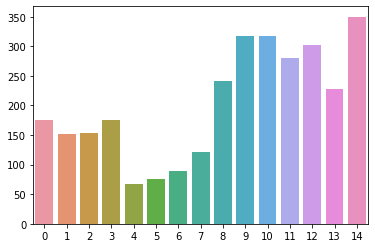

In [86]:
import seaborn as sns
_, train_counts = np.unique(y_train, return_counts=True)
sns.barplot(_, train_counts)

Epoch 1/20
21/21 [==============================] - 1s 64ms/step - loss: 22.7987 - accuracy: 0.1637 - val_loss: 2.9271 - val_accuracy: 0.2318
Epoch 2/20
21/21 [==============================] - 1s 56ms/step - loss: 2.0568 - accuracy: 0.4338 - val_loss: 2.0923 - val_accuracy: 0.4090
Epoch 3/20
21/21 [==============================] - 1s 57ms/step - loss: 1.3641 - accuracy: 0.6603 - val_loss: 1.6912 - val_accuracy: 0.5622
Epoch 4/20
21/21 [==============================] - 1s 55ms/step - loss: 0.6573 - accuracy: 0.8392 - val_loss: 1.4940 - val_accuracy: 0.6428
Epoch 5/20
21/21 [==============================] - 1s 57ms/step - loss: 0.2548 - accuracy: 0.9529 - val_loss: 1.4859 - val_accuracy: 0.6378
Epoch 6/20
21/21 [==============================] - 1s 57ms/step - loss: 0.1028 - accuracy: 0.9858 - val_loss: 1.5901 - val_accuracy: 0.6269
Epoch 7/20
21/21 [==============================] - 1s 57ms/step - loss: 0.0351 - accuracy: 0.9971 - val_loss: 1.6046 - val_accuracy: 0.6368
Epoch 8/20
2

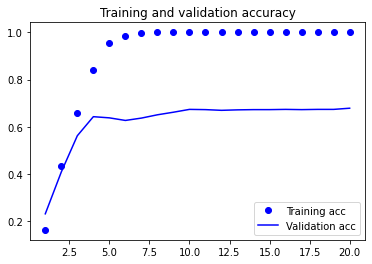

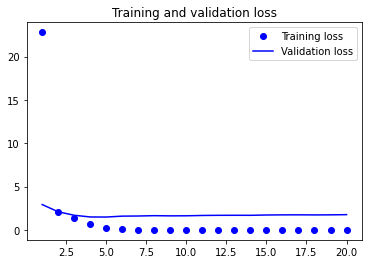

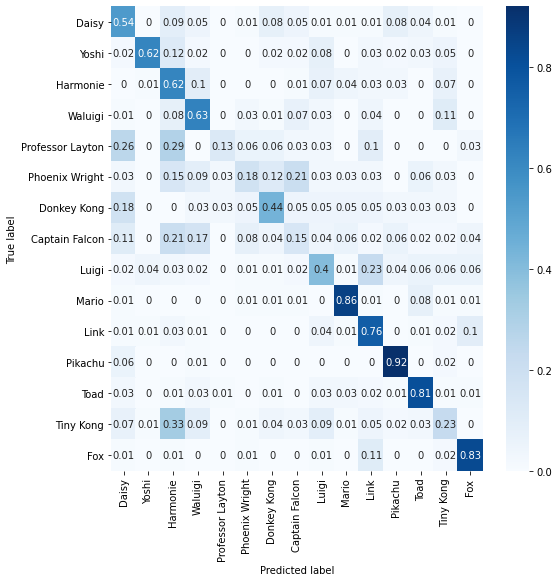

In [16]:
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import seaborn as sns


CNN1 = keras.Sequential()
CNN1.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN1.add(keras.layers.Flatten())
CNN1.add(keras.layers.Dense(64, activation='relu'))
CNN1.add(keras.layers.Dense(15, activation='softmax'))
 
CNN1.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history = CNN1.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.33)
    
print("Test evaluation")
CNN1.evaluate(X_test, y_test)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

y_pred=CNN1.predict_classes(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Epoch 1/30
21/21 [==============================] - 2s 76ms/step - loss: 81.5995 - accuracy: 0.3735 - val_loss: 23.7904 - val_accuracy: 0.2060
Epoch 2/30
21/21 [==============================] - 1s 69ms/step - loss: 9.9016 - accuracy: 0.6642 - val_loss: 5.9380 - val_accuracy: 0.2458
Epoch 3/30
21/21 [==============================] - 1s 69ms/step - loss: 2.7850 - accuracy: 0.7775 - val_loss: 4.5712 - val_accuracy: 0.2129
Epoch 4/30
21/21 [==============================] - 1s 69ms/step - loss: 1.3062 - accuracy: 0.8657 - val_loss: 5.2039 - val_accuracy: 0.1174
Epoch 5/30
21/21 [==============================] - 1s 69ms/step - loss: 0.6057 - accuracy: 0.9069 - val_loss: 5.1342 - val_accuracy: 0.0607
Epoch 6/30
21/21 [==============================] - 1s 69ms/step - loss: 0.4215 - accuracy: 0.9348 - val_loss: 5.4992 - val_accuracy: 0.0577
Epoch 7/30
21/21 [==============================] - 1s 68ms/step - loss: 0.2832 - accuracy: 0.9593 - val_loss: 5.9834 - val_accuracy: 0.0786
Epoch 8/30


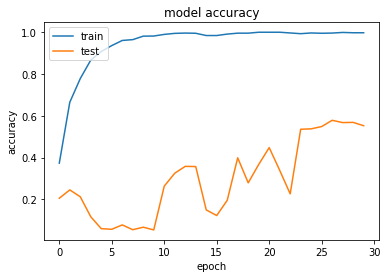

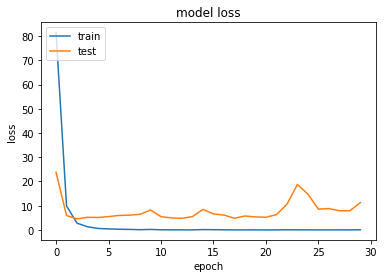

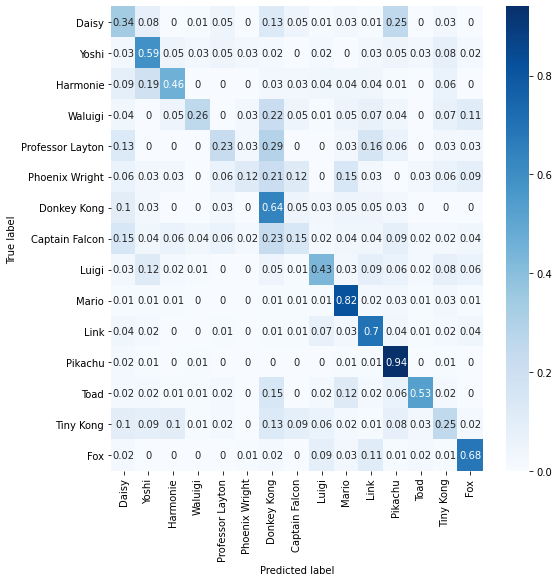

In [17]:
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import seaborn as sns
import pandas as pd
X_train =x_train/255

X_test = x_test/255
CNN2 = keras.Sequential()
CNN2.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN2.add(keras.layers.BatchNormalization())
CNN2.add(keras.layers.Flatten())
CNN2.add(keras.layers.Dense(64, activation='relu'))
CNN2.add(keras.layers.Dense(15, activation='softmax'))
 
CNN2.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history = CNN2.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.33)
    
print("Test evaluation")
CNN2.evaluate(X_test, y_test)

#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred=CNN2.predict_classes(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


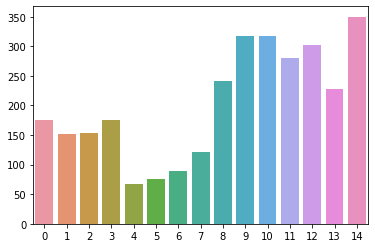

In [21]:
import seaborn as sns
_, train_counts = np.unique(train_labels, return_counts=True)
sns.barplot(_, train_counts)

Epoch 1/20
21/21 [==============================] - 1s 54ms/step - loss: 4.8024 - accuracy: 0.0721 - val_loss: 2.6609 - val_accuracy: 0.0498
Epoch 2/20
21/21 [==============================] - 1s 47ms/step - loss: 2.6282 - accuracy: 0.0480 - val_loss: 2.6038 - val_accuracy: 0.0239
Epoch 3/20
21/21 [==============================] - 1s 48ms/step - loss: 2.5257 - accuracy: 0.1039 - val_loss: 2.5024 - val_accuracy: 0.1333
Epoch 4/20
21/21 [==============================] - 1s 48ms/step - loss: 2.2972 - accuracy: 0.1882 - val_loss: 2.1719 - val_accuracy: 0.2398
Epoch 5/20
21/21 [==============================] - 1s 48ms/step - loss: 1.9387 - accuracy: 0.3118 - val_loss: 1.9988 - val_accuracy: 0.3403
Epoch 6/20
21/21 [==============================] - 1s 48ms/step - loss: 1.6910 - accuracy: 0.4074 - val_loss: 1.8376 - val_accuracy: 0.4000
Epoch 7/20
21/21 [==============================] - 1s 48ms/step - loss: 1.4183 - accuracy: 0.5485 - val_loss: 1.7311 - val_accuracy: 0.4826
Epoch 8/20
21

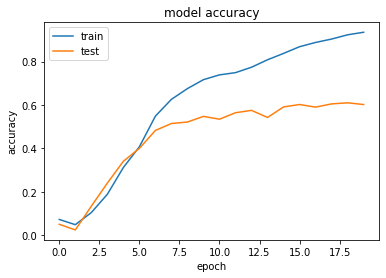

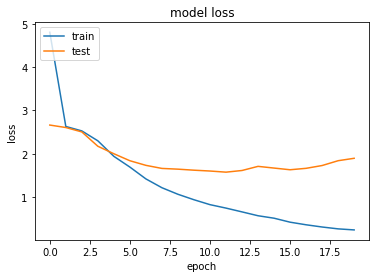

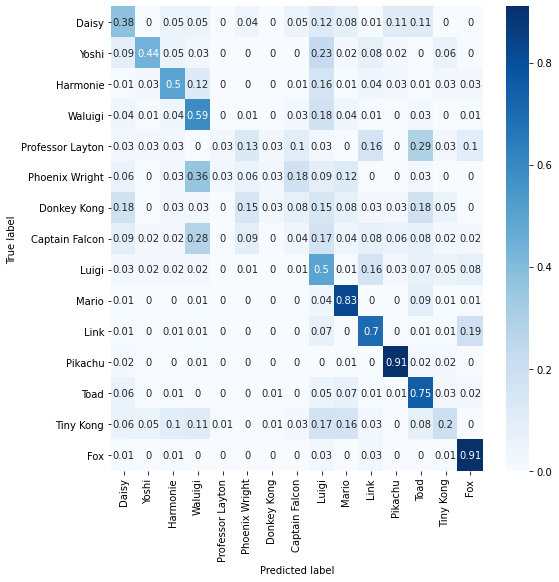

Test evaluation
42/42 [==============================] - 0s 7ms/step - loss: 2.0532 - accuracy: 0.5814


[2.0531795024871826, 0.5813777446746826]

In [20]:
import matplotlib.pyplot as plt
import keras
 
CNN3 = keras.Sequential()
CNN3.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN3.add(keras.layers.Dropout(0.25))
CNN3.add(keras.layers.Flatten())
CNN3.add(keras.layers.Dense(64, activation='relu'))
CNN3.add(keras.layers.Dense(15, activation='softmax'))
 
CNN3.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history=CNN3.fit(X_train, y_train, validation_split=0.33,epochs=20, batch_size=100, verbose=1)
#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred=CNN3.predict_classes(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Test evaluation")
CNN3.evaluate(X_test, y_test)

Epoch 1/30
21/21 [==============================] - 1s 60ms/step - loss: 2.6684 - accuracy: 0.1686 - val_loss: 2.2638 - val_accuracy: 0.3085
Epoch 2/30
21/21 [==============================] - 1s 50ms/step - loss: 1.9599 - accuracy: 0.3750 - val_loss: 1.7227 - val_accuracy: 0.5144
Epoch 3/30
21/21 [==============================] - 1s 51ms/step - loss: 1.4403 - accuracy: 0.5892 - val_loss: 1.4514 - val_accuracy: 0.5731
Epoch 4/30
21/21 [==============================] - 1s 52ms/step - loss: 1.1176 - accuracy: 0.6775 - val_loss: 1.2894 - val_accuracy: 0.6348
Epoch 5/30
21/21 [==============================] - 1s 51ms/step - loss: 0.8798 - accuracy: 0.7363 - val_loss: 1.1984 - val_accuracy: 0.6478
Epoch 6/30
21/21 [==============================] - 1s 51ms/step - loss: 0.6708 - accuracy: 0.8113 - val_loss: 1.1761 - val_accuracy: 0.6547
Epoch 7/30
21/21 [==============================] - 1s 51ms/step - loss: 0.5176 - accuracy: 0.8657 - val_loss: 1.1396 - val_accuracy: 0.6627
Epoch 8/30
21

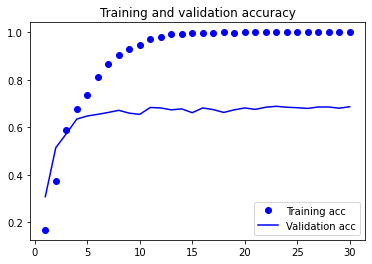

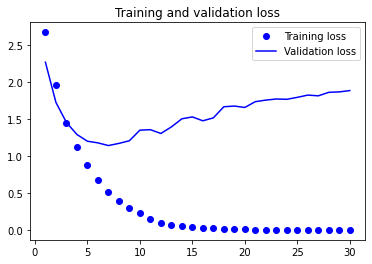

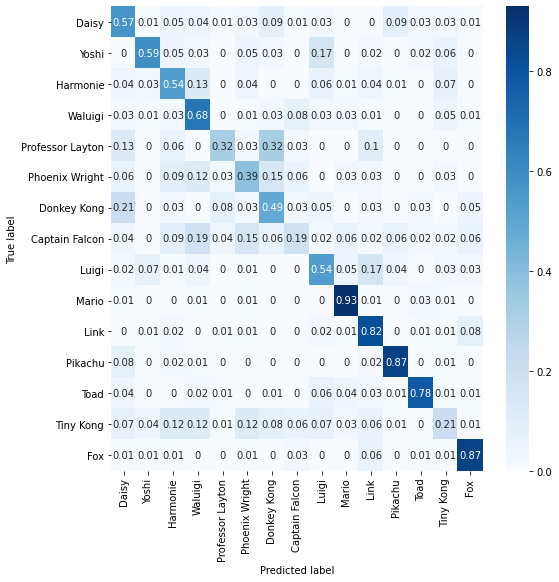

In [25]:
CNN4 = keras.Sequential()
CNN4.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN4.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', strides=(1,1)))
CNN4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN4.add(keras.layers.Dropout(0.25))
CNN4.add(keras.layers.Flatten())
CNN4.add(keras.layers.Dense(64, activation='relu'))
CNN4.add(keras.layers.Dense(15, activation='softmax'))
 
CNN4.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='sparse_categorical_crossentropy',metrics='accuracy')
 
history = CNN4.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.33)
    
print("Test evaluation")
CNN4.evaluate(X_test, y_test)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

y_pred=CNN4.predict_classes(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = class_names, 
                     columns = class_names)
  
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [44]:
#code pour connaitre le nombre d'image par catégorie
total = 0
import os
pathFold1 = '/content/drive/My Drive/Images Projet Final/test/Output test'
listUnfold1 = os.listdir(pathFold1)
for unfold2 in listUnfold1 :
    

    pathUnfold2 = pathFold1 + '/'+ unfold2 # chemin accés au sous sous dossier, ex bateau
    listImgToSlice = os.listdir(pathUnfold2) # liste des images d'un sous sous dossiers (tel que bateau) à couper
    print(unfold2 , " possede ", len(listImgToSlice), " éléments.")
    total  =total + len(listImgToSlice)
print(total)


Captain Falcon  possede  53  éléments.
Daisy  possede  76  éléments.
Donkey Kong  possede  39  éléments.
Fox  possede  150  éléments.
Harmonie  possede  68  éléments.
Link  possede  136  éléments.
Luigi  possede  104  éléments.
Mario  possede  137  éléments.
Phoenix Wright  possede  33  éléments.
Pikachu  possede  121  éléments.
Professor Layton  possede  31  éléments.
Tiny Kong  possede  101  éléments.
Toad  possede  130  éléments.
Waluigi  possede  76  éléments.
Yoshi  possede  66  éléments.
models  possede  1  éléments.
1322


In [43]:
#code pour connaitre le nombre d'image par catégorie
total2=0
import os
pathFold1 = '/content/drive/My Drive/Images Projet Final/train/Output train'
listUnfold1 = os.listdir(pathFold1)
for unfold2 in listUnfold1 :
    

    pathUnfold2 = pathFold1 + '/'+ unfold2 # chemin accés au sous sous dossier, ex bateau
    listImgToSlice = os.listdir(pathUnfold2) # liste des images d'un sous sous dossiers (tel que bateau) à couper
    print(unfold2 , " possede ", len(listImgToSlice), " éléments.")
    total2  =total2 + len(listImgToSlice)
print(total2)


Yoshi  possede  152  éléments.
Waluigi  possede  175  éléments.
Toad  possede  303  éléments.
Tiny Kong  possede  227  éléments.
Professor Layton  possede  67  éléments.
Pikachu  possede  281  éléments.
Phoenix Wright  possede  75  éléments.
Mario  possede  317  éléments.
Link  possede  317  éléments.
Luigi  possede  242  éléments.
Harmonie  possede  154  éléments.
Captain Falcon  possede  121  éléments.
Fox  possede  350  éléments.
Donkey Kong  possede  89  éléments.
Daisy  possede  175  éléments.
3045


In [77]:
#code pour connaitre le nombre d'image par catégorie
total2=0
import os
pathFold1 = '/content/drive/My Drive/Images Projet Final/train'
listUnfold1 = os.listdir(pathFold1)
for unfold2 in listUnfold1 :
    

    pathUnfold2 = pathFold1 + '/'+ unfold2 # chemin accés au sous sous dossier, ex bateau
    listImgToSlice = os.listdir(pathUnfold2) # liste des images d'un sous sous dossiers (tel que bateau) à couper
    print(unfold2 , " possede ", len(listImgToSlice), " éléments.")
    total2  =total2 + len(listImgToSlice)
print(total2)


Mario  possede  317  éléments.
Luigi  possede  242  éléments.
Yoshi  possede  144  éléments.
Link  possede  317  éléments.
Captain Falcon  possede  111  éléments.
Toad  possede  303  éléments.
Waluigi  possede  165  éléments.
Fox  possede  350  éléments.
Daisy  possede  165  éléments.
Harmonie  possede  144  éléments.
Professor Layton  possede  71  éléments.
Donkey Kong  possede  79  éléments.
Tiny Kong  possede  228  éléments.
Pikachu  possede  281  éléments.
Phoenix Wright  possede  70  éléments.
Output train  possede  15  éléments.
3002


In [46]:
total+total2

4367

In [64]:
!pip install Augmentor

In [75]:
import Augmentor
path = "/content/drive/My Drive/Images Projet Final/train/Output train" 
path_list = os.listdir(path)
for img in path_list : 
  if len(os.listdir(path+'/'+img)) < 90:
    p=Augmentor.Pipeline(path+'/'+img)
    p.rotate(probability = 1, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.6, min_factor=1.2, max_factor=1.7)
    p.sample(10)
    p.process()

Processing <PIL.Image.Image image mode=RGB size=203x248 at 0x7F5DA25A24E0>:  10%|█         | 1/10 [00:00<00:01,  5.62 Samples/s]

Initialised with 67 image(s) found.
Output directory set to /content/drive/My Drive/Images Projet Final/train/Output train/Professor Layton/output.

Processing <PIL.Image.Image image mode=RGB size=288x175 at 0x7F5DA25A2518>: 100%|██████████| 10/10 [00:00<00:00, 23.46 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=225x225 at 0x7F5D3C2C8160>: 100%|██████████| 67/67 [00:02<00:00, 30.97 Samples/s]
Executing Pipeline:   0%|          | 0/10 [00:00<?, ? Samples/s]

Initialised with 75 image(s) found.
Output directory set to /content/drive/My Drive/Images Projet Final/train/Output train/Phoenix Wright/output.

Processing <PIL.Image.Image image mode=RGB size=257x196 at 0x7F5DA252E908>: 100%|██████████| 10/10 [00:00<00:00, 39.27 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=220x220 at 0x7F5D3C7964E0>: 100%|██████████| 75/75 [00:02<00:00, 30.36 Samples/s]
